# PCB Thermography Analysis Program
### Objective
This program is designed to process PCB thermography images (both radiometric `.tif` and non-radiometric `.jpg`/`.png` formats). The workflow involves:
1. Loading and displaying the thermography image.
2. Selecting and centering the PCB by defining the corners.
3. Defining emissivity shapes (circles, quadrilaterals).
4. Calibrating the image based on emissivity and temperature data.

The program adapts to both `.tif` (radiometric) images and non-radiometric RGB images (`.jpg`, `.png`).

---


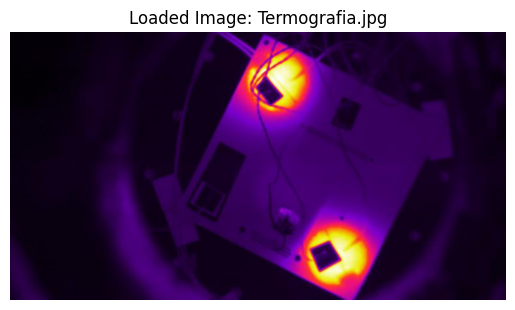

Image Termografia.jpg loaded and displayed successfully.


In [1]:
# Import necessary modules and functions
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# Import the image processing module
from image_processing import load_and_display_image, select_corners_jpg, select_corners_tif
import emissivity_processing as ep


# Ask the user for the image file name (including extension)
image_name = input("Please enter the image name with extension (e.g., image.jpg or image.tif): ")

# Call the function to load and display the image
image = load_and_display_image(image_name)

# Check if the image was successfully loaded
if image is not None:
    print(f"Image {image_name} loaded and displayed successfully.")
else:
    print(f"Failed to load the image {image_name}.")


Seleccione 4 esquinas del PCB haciendo clic en la imagen.
Esquinas seleccionadas: [(423, 5), (731, 154), (572, 447), (277, 303)]


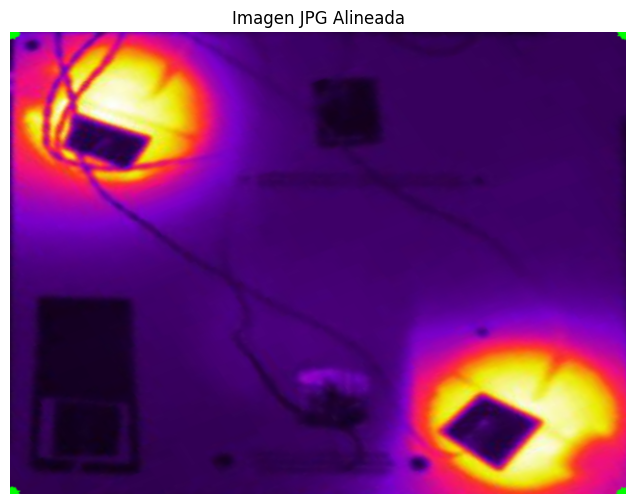

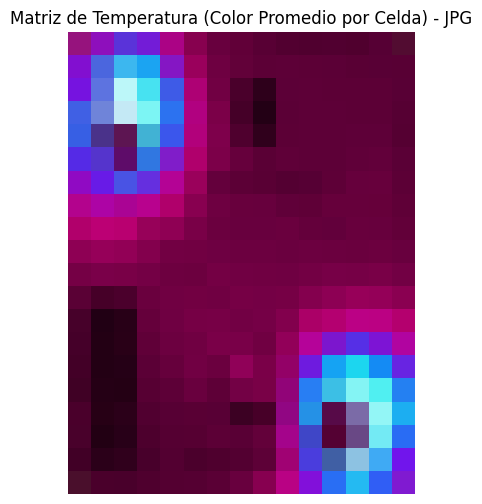

Tramo de la matriz RGB de la imagen JPG:
[[[150.17757937  19.77480159 125.52281746]
  [142.27906977  15.34883721 188.42151163]
  [ 90.35658915  51.93410853 217.83139535]
  [115.17757937  28.34027778 215.47222222]
  [171.72093023   3.21317829 133.74612403]]

 [[130.1577381   15.58829365 208.04761905]
  [ 75.68895349 102.51065891 222.50484496]
  [ 60.75387597 183.12403101 239.55426357]
  [ 27.79365079 164.56150794 242.54761905]
  [133.30135659  22.58236434 196.02228682]]

 [[118.17559524  19.81349206 224.14384921]
  [ 93.72286822 115.74418605 224.23449612]
  [188.21802326 247.3003876  249.61337209]
  [ 71.36706349 226.13293651 241.57440476]
  [ 62.35852713  91.98352713 231.91085271]]

 [[ 64.03174603  96.12003968 228.43948413]
  [111.96899225 132.6375969  217.05910853]
  [196.05620155 233.74515504 245.24709302]
  [124.08333333 245.09821429 244.03174603]
  [ 44.12693798 114.93604651 240.03585271]]

 [[ 55.71428571  95.32837302 228.27083333]
  [ 74.26065891  50.36046512 138.09011628]
  [ 9

In [2]:
# Definir la ruta completa de la imagen
image_path = os.path.join("Images", image_name)

# Comprobar la extensión de la imagen (.jpg/.png o .tif)
extension = image_name.split('.')[-1].lower()

# Bandera para saber si estamos procesando un .tif
is_tif = False

if extension in ['jpg', 'png']:
    # Si es .jpg o .png, seleccionar esquinas, alinear la imagen y calcular la matriz de temperatura RGB
    aligned_image_jpg, temperature_matrix_jpg, corners = select_corners_jpg(cv2.imread(image_path))
    
    # print("Imagen .jpg/.png alineada y transformada.")
    # plt.imshow(cv2.cvtColor(aligned_image_jpg, cv2.COLOR_BGR2RGB))
    # plt.title("Imagen Alineada")
    # plt.axis('off')
    # plt.show()

    # Imprimir un tramo de la matriz RGB para asegurar que no está en escala de grises
    print("Tramo de la matriz RGB de la imagen JPG:")
    print(temperature_matrix_jpg[:5, :5, :])  # Imprimir los primeros 5x5 elementos de la matriz RGB

elif extension == 'tif':
    # Si es .tif, activar la bandera para evitar el procesamiento RGB
    is_tif = True

    # Generar un .jpg temporal para la selección de esquinas
    temp_jpg_path = "Images/temp_image.jpg"
    aligned_visual_tif, aligned_radiometric_data = select_corners_tif(image_path, cv2.imread(image_path, cv2.IMREAD_UNCHANGED), temp_jpg_path)

    print("Imagen .tif alineada y transformada.")

    # Mostrar el heatmap de los datos radiométricos
    plt.imshow(aligned_radiometric_data, cmap='hot')
    plt.colorbar(label="Temperatura (Escala relativa)")
    plt.title("Heatmap de los Datos Radiométricos Alineados")
    plt.axis('off')
    plt.show()

else:
    print("Formato de archivo no soportado. Solo se soportan archivos .jpg, .png y .tif.")

Please click on 4 points to define the polygon.
Please click five points on the perimeter of the circle.


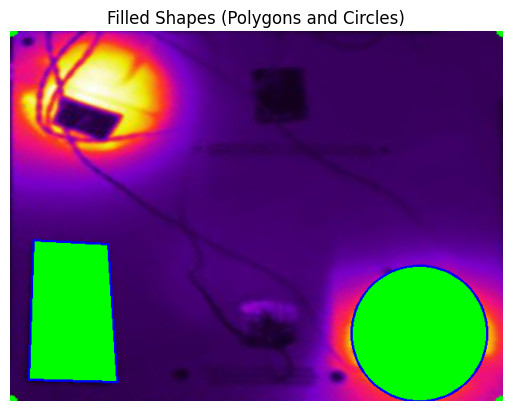

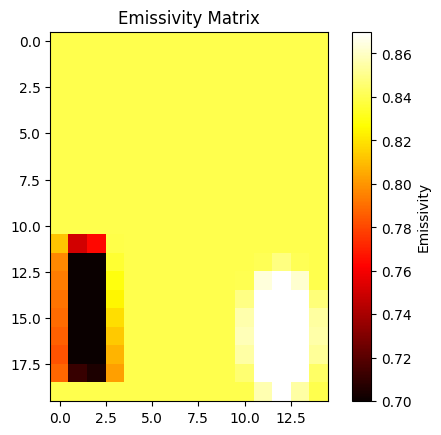


Emissivity information for defined shapes:
Polygon 1: Emissivity = 0.7
Circle 2: Emissivity = 0.87


In [7]:
base_emissivity = float(input("Enter the base emissivity value for the PCB: "))

# Pass the correct image based on the extension
if extension in ['jpg', 'png']:
    emissivity_matrix = ep.process_emissivity(aligned_image_jpg, base_emissivity)
elif extension == 'tif':
    emissivity_matrix = ep.process_emissivity(aligned_visual_tif, base_emissivity)

In [1]:
print("hello world")

hello world
